In [5]:
# import necessary libraries
import os
import torch
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [7]:
%matplotlib inline

In [8]:
# load the dataset
data = pd.read_csv('data.csv')

In [9]:
# check for basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
# show first few recoreds
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [11]:
# check for any missing values
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [12]:
# diagnosis distribution
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Main target is the diagnosis column (M = malignant or B = benign) so let's turn the strings into 1 and 0

In [13]:
# encode categorical data
data['diagnosis'].replace({'M': 1, 'B': 0}, inplace = True)

Next step is to prepare the training and test sets, id and "Unamed: 32" columns won't help us in the prediction so we gonna drop them

In [14]:
Y = data['diagnosis'].to_numpy()

In [15]:
X = data.drop(['id', 'diagnosis', 'Unnamed: 32'], axis = 1)

In [16]:
# split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

To have better results, a bit of scaling is important so that neither of features dominate the other

In [17]:
# feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Now we can make sure the data is nicely distributed. Then the next step is to create the model with training data and afterwards, testing is done using test data.

In [18]:
# create the model
model = torch.nn.Linear(X_train.shape[1], 1)

We didn't use the sigmoid activation function here. Rather, we used the binary cross-entropy with logits loss function instead of the binary cross-entropy loss function combined with the sigmoid function because it's more numerically stable and leads to better results than using a plain Sigmoid followed by a BCELoss.

In [19]:
# load sets in format compatible with pytorch
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))

In [20]:
y_train = torch.from_numpy(y_train).float().reshape(-1, 1)
y_test = torch.from_numpy(y_test).float().reshape(-1, 1)

Finally, we can now specify the hyperparameters and iterate through the train data to run the model

In [21]:
def configure_loss_function():
    return torch.nn.BCEWithLogitsLoss()

In [22]:
# use Adam optimiser for gradient descent
def configure_optimizer(model):
    return torch.optim.Adam(model.parameters(), lr = 0.0007)

In [23]:
# define the loss function to compare the output with the target
criterion = configure_loss_function()
optimizer = configure_optimizer(model)

As we have our model compiled, it's time for training

In [24]:
# run the model
epochs = 2000
# initialise the train_loss & test_losses which will be updated
train_losses = np.zeros(epochs)
test_losses = np.zeros(epochs)

for epoch in range(epochs): 
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    # clear old gradients from the last step
    optimizer.zero_grad()
    # compute the gradients necessary to adjust the weights
    loss.backward()
    # update the weights of the neural network
    optimizer.step()

    outputs_test = model(X_test)
    loss_test = criterion(outputs_test, y_test)

    train_losses[epoch] = loss.item()
    test_losses[epoch] = loss_test.item()

    if (epoch + 1) % 50 == 0:
      print (str('Epoch ') + str((epoch+1)) + str('/') + str(epochs) + str(',  training loss = ') + str((loss.item())) + str(', test loss = ') + str(loss_test.item()))

Epoch 50/2000,  training loss = 0.7530729174613953, test loss = 0.8353416919708252
Epoch 100/2000,  training loss = 0.5565900206565857, test loss = 0.602820634841919
Epoch 150/2000,  training loss = 0.4373137652873993, test loss = 0.4638345241546631
Epoch 200/2000,  training loss = 0.3623969554901123, test loss = 0.3794008195400238
Epoch 250/2000,  training loss = 0.3119088113307953, test loss = 0.32469597458839417
Epoch 300/2000,  training loss = 0.27560219168663025, test loss = 0.28683552145957947
Epoch 350/2000,  training loss = 0.24814236164093018, test loss = 0.259147971868515
Epoch 400/2000,  training loss = 0.22657164931297302, test loss = 0.23800218105316162
Epoch 450/2000,  training loss = 0.20913293957710266, test loss = 0.2212972342967987
Epoch 500/2000,  training loss = 0.19471587240695953, test loss = 0.2077455073595047
Epoch 550/2000,  training loss = 0.18258145451545715, test loss = 0.19651658833026886
Epoch 600/2000,  training loss = 0.17221702635288239, test loss = 0.1

Good, our model has been trained, now it's time to show the loss and accuracy

Text(0.5, 1.0, 'Model Loss')

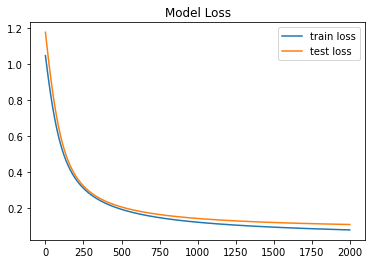

In [25]:
# visualise the test and train loss
plt.plot(train_losses, label = 'train loss')
plt.plot(test_losses, label = 'test loss')
plt.legend()
plt.title('Model Loss')

Calculate the backward over the validation set

In [26]:
with torch.no_grad():
  output_train = model(X_train)
  output_train = (output_train.numpy() > 0)

  train_acc = np.mean(y_train.numpy() == output_train)

  output_test = model(X_test)
  output_test = (output_test.numpy() > 0)
  
  test_acc = np.mean(y_test.numpy() == output_test)

In [27]:
print ('Train accuracy is: ' + str(train_acc))

Train accuracy is: 0.9824120603015075


In [28]:
print ('Test accuracy is: ' + str(train_acc))

Test accuracy is: 0.9824120603015075
